<a href="https://colab.research.google.com/github/Hriday1824/Image-Processing/blob/main/Image_Processing_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0 1000
0 2500
0 5000


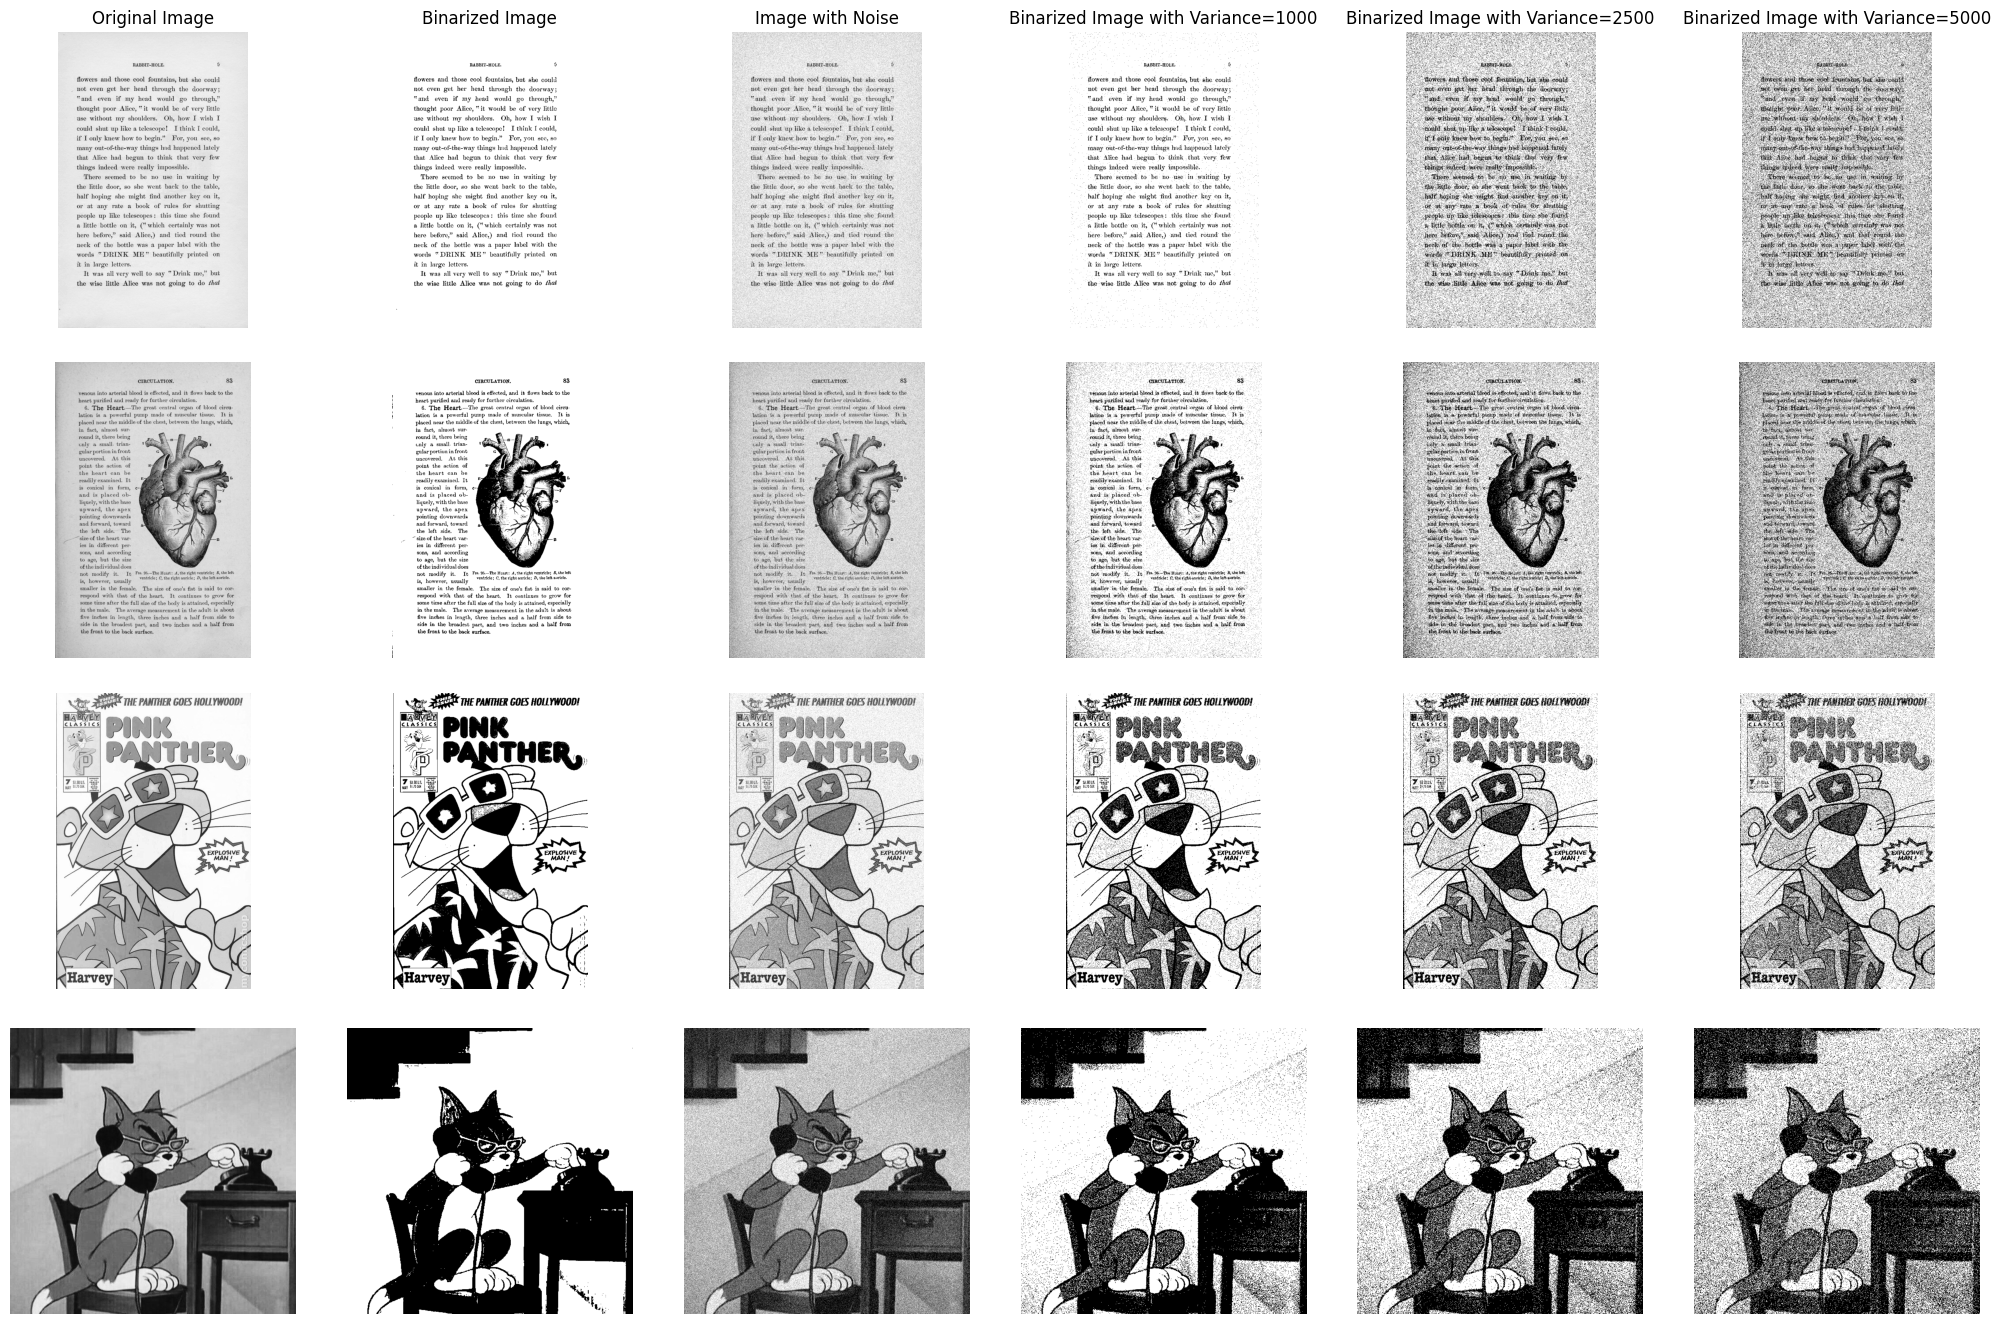

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
image1=cv.imread("/content/drive/MyDrive/Probability_6/bookpage_1.jpeg",0)     #book1
image2=cv.imread("/content/drive/MyDrive/Probability_6/bookpage_2.jpeg",0)     #book2
image3=cv.imread("/content/drive/MyDrive/Probability_6/panther.jpeg",0)        #panther
image4=cv.imread("/content/drive/MyDrive/Probability_6/tom.jpeg",0)            #tom
def histogram(image):
  hist=[0]*256
  a,b=image.shape
  for i in range(a):
    for j in range(b):
      hist[round(image[i,j])]+=1
  return np.array(hist)/np.sum(hist)
def threshold(img):
  hist=histogram(img)
  L1=[]
  L2=[]
  for i in range(256):
    W1=0
    W2=0
    for j in range(i+1):
      W1+=hist[j]
    for j in range(i+1,256):
      W2+=(hist[j])
    mu1,mu2=0,0
    for k in range(1,i+1):
      mu1+=k*hist[k]/W1
    for k in range(i+1,256):
      mu2+=k*hist[k]/W2
    variance1,variance2=0,0
    for l in range(1,i+1):
      variance1+=((l-mu1)**2)*hist[l]/W1
    for l in range(i+1,256):
      variance2+=((l-mu2)**2)*hist[l]/W2
    L1.append(W1*W2*(mu1-mu2)**2)
    L2.append(W1*variance1+W2*variance2)
  T=L1.index(max(L1))
  t=L2.index(min(L2))
  return T
def binary_image(img,t):
  b_I=np.zeros_like(img)
  b_I[img>=t]=255
  return b_I
def noisy_image(img,mu,sigma):
  N=np.random.normal(mu,np.sqrt(sigma),img.shape)
  I=img+N
  new_img=np.zeros(I.shape)
  l,b=I.shape
  for i in range(l):
    for j in range(b):
      new_img[i,j]=min(round(max(I[i,j],0)),255)
  return new_img
mu,V=map(int,input().split())
mu1,V1=map(int,input().split())
mu2,V2=map(int,input().split())
images=[image1,image2,image3,image4]
noisy_images=[]
noisy_images1=[]
noisy_images2=[]
for i in range(4):
  noisy_images.append(noisy_image(images[i],mu,V))
  noisy_images1.append(noisy_image(images[i],mu1,V1))
  noisy_images2.append(noisy_image(images[i],mu2,V2))
plt.figure(figsize=(20,20))
for i in range(4):
  plt.subplot(6,6,1+6*i)
  plt.imshow(images[i],cmap="gray")
  if i==0:
    plt.title("Original Image")
  plt.tight_layout()
  plt.axis("off")
  plt.subplot(6,6,2+6*i)
  plt.imshow(binary_image((images[i]),threshold(images[i])),cmap="gray")
  if i==0:
    plt.title("Binarized Image")
  plt.tight_layout()
  plt.axis("off")
  plt.subplot(6,6,3+6*i)
  plt.imshow(noisy_images[i],cmap="gray")
  if i==0:
    plt.title("Image with Noise")
  plt.tight_layout()
  plt.axis("off")
  plt.subplot(6,6,4+6*i)
  plt.imshow(binary_image((noisy_images[i]),threshold(noisy_images[i])),cmap="gray")
  if i==0:
    plt.title(f"Binarized Image with Variance={V}")
  plt.tight_layout()
  plt.axis("off")
  plt.subplot(6,6,5+6*i)
  plt.imshow(binary_image((noisy_images1[i]),threshold(noisy_images1[i])),cmap="gray")
  if i==0:
    plt.title(f"Binarized Image with Variance={V1}")
  plt.tight_layout()
  plt.axis("off")
  plt.subplot(6,6,6+6*i)
  plt.imshow(binary_image((noisy_images2[i]),threshold(noisy_images2[i])),cmap="gray")
  if i==0:
    plt.title(f"Binarized Image with Variance={V2}")
  plt.tight_layout()
  plt.axis("off")

# Image Binarization
In this assignment, we are performing Image Binarization by Otsu's Method. Image BInarization is a method of converting graysclae image into a black and white image. THis is done by the method of thresholding.

Procedure for Image Thresholding:
1.   We will create the histogram of an image.
2.   We will divide the pixels into two class C1 and C2 such that if the probability of pixel value is less than the threshold value t then it goes into C1 otherwise C2 and t lies in [0,255].
3.   We will calculate the mean and variance of two classes and further we will calculate the within class variance and between class variacne by using the given formula.
4.  We will find the maximum value of between class variance and it wll be the thresholding value.
5.  We will change the value of pixels to 255 if it is greater than the threshold value. We will obtain the Binarized Image.
6.  Now we will add Gaussian Noise to the original image and get its binarized images by varying the input values of variances.


# Results
On binarizing the original image, we will get a black and white image. By adding noise to the original image, we will observe that the quality of image gets increased, the details of the image are more clearly visible. On binarizing the noisy image with varying value of variance, we will observe that on increasing the value of variance, the image gets more blurry and the object is not clearly visible on higher values of variances. The randomness in the image increases with higher variances, which makes the process of thresholding complex as the pixels values varies highly.






